In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.pyplot import figure

In [92]:
score_df = pd.read_excel("./datasets/IPLFinal.xlsx")
score_df

,Batting Team,Over,Ball #,Batsman Facing,Bowler,Runs Scored,Extra,Cumulative Score,Wickets
0,Mumbai,0,1,Quinton de Kock,Deepak Chahar,1,0,1,0
1,Mumbai,0,2,Rohit Sharma,Deepak Chahar,1,0,2,0
2,Mumbai,0,3,Quinton de Kock,Deepak Chahar,0,0,2,0
3,Mumbai,0,4,Quinton de Kock,Deepak Chahar,0,0,2,0
4,Mumbai,0,5,Quinton de Kock,Deepak Chahar,0,0,2,0
5,Mumbai,0,6,Quinton de Kock,Deepak Chahar,0,0,2,0
6,Mumbai,1,1,Rohit Sharma,Shardul Thakur,2,0,4,0
7,Mumbai,1,2,Rohit Sharma,Shardul Thakur,0,0,4,0
8,Mumbai,1,3,Rohit Sharma,Shardul Thakur,0,0,4,0
9,Mumbai,1,4,Rohit Sharma,Shardul Thakur,0,0,4,0


In [93]:
score_df.dtypes

Batting Team        object
Over                 int64
Ball #               int64
Batsman Facing      object
Bowler              object
Runs Scored         object
Extra                int64
Cumulative Score     int64
Wickets              int64
dtype: object

In [94]:
def wkt_indicator(value):
    value = str(value)
    flag = value.split()
    if flag[0] is 'W' or flag[len(flag)-1] is 'W':
        return 1
    else:
        return 0

In [95]:
def runs_extractor(value):
    value = str(value)
    flag = value.split()
    if(flag[0] is not 'W'):
        return flag[0]
    else:
        return 0

In [96]:
score_df['Wicket Indicator'] = score_df['Runs Scored'].apply(wkt_indicator)
score_df['Runs Scored'] = score_df['Runs Scored'].apply(runs_extractor)
score_df['Wicket Indicator'] = pd.to_numeric(score_df['Wicket Indicator'])
score_df['Runs Scored'] = pd.to_numeric(score_df['Runs Scored'])
score_df

,Batting Team,Over,Ball #,Batsman Facing,Bowler,Runs Scored,Extra,Cumulative Score,Wickets,Wicket Indicator
0,Mumbai,0,1,Quinton de Kock,Deepak Chahar,1,0,1,0,0
1,Mumbai,0,2,Rohit Sharma,Deepak Chahar,1,0,2,0,0
2,Mumbai,0,3,Quinton de Kock,Deepak Chahar,0,0,2,0,0
3,Mumbai,0,4,Quinton de Kock,Deepak Chahar,0,0,2,0,0
4,Mumbai,0,5,Quinton de Kock,Deepak Chahar,0,0,2,0,0
5,Mumbai,0,6,Quinton de Kock,Deepak Chahar,0,0,2,0,0
6,Mumbai,1,1,Rohit Sharma,Shardul Thakur,2,0,4,0,0
7,Mumbai,1,2,Rohit Sharma,Shardul Thakur,0,0,4,0,0
8,Mumbai,1,3,Rohit Sharma,Shardul Thakur,0,0,4,0,0
9,Mumbai,1,4,Rohit Sharma,Shardul Thakur,0,0,4,0,0


In [97]:
mumbai_inns = score_df.loc[score_df['Batting Team'].isin(['Mumbai'])]
chennai_inns = score_df.loc[score_df['Batting Team'].isin(['Chennai'])]

In [98]:
mumbai_endover_score = mumbai_inns.loc[mumbai_inns['Ball #'].isin([6])]
mumbai_endover_score = mumbai_endover_score.drop(columns=['Ball #', 'Batsman Facing', 'Bowler', 'Runs Scored', 'Extra', 'Wicket Indicator'])
mumbai_endover_score['Over'] = mumbai_endover_score['Over'] + 1
mumbai_endover_score

,Batting Team,Over,Cumulative Score,Wickets
5,Mumbai,1,2,0
11,Mumbai,2,10,0
17,Mumbai,3,29,0
24,Mumbai,4,37,0
30,Mumbai,5,45,1
36,Mumbai,6,45,2
42,Mumbai,7,50,2
48,Mumbai,8,53,2
54,Mumbai,9,57,2
61,Mumbai,10,69,2


In [99]:
chennai_endover_score = chennai_inns.loc[chennai_inns['Ball #'].isin([6])]
chennai_endover_score = chennai_endover_score.drop(columns=['Ball #', 'Batsman Facing', 'Bowler', 'Runs Scored', 'Extra', 'Wicket Indicator'])
chennai_endover_score['Over'] = chennai_endover_score['Over'] + 1
chennai_endover_score

,Batting Team,Over,Cumulative Score,Wickets
128,Chennai,1,7,0
134,Chennai,2,12,0
140,Chennai,3,19,0
146,Chennai,4,33,1
152,Chennai,5,38,1
158,Chennai,6,53,1
165,Chennai,7,57,1
172,Chennai,8,60,1
178,Chennai,9,70,1
185,Chennai,10,72,2


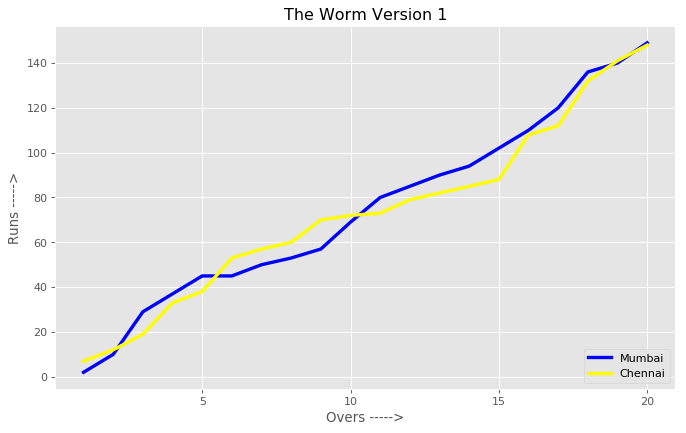

In [100]:
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.xticks([5,10,15,20])
    plt.plot(mumbai_endover_score['Over'],mumbai_endover_score['Cumulative Score'], color='blue', linewidth=3, label='Mumbai')
    plt.plot(chennai_endover_score['Over'],chennai_endover_score['Cumulative Score'], color='yellow', linewidth=3, label='Chennai')
    plt.xlabel('Overs ----->')
    plt.ylabel('Runs ----->')
    plt.title('The Worm Version 1')
    plt.legend(loc='lower right')
    plt.show()

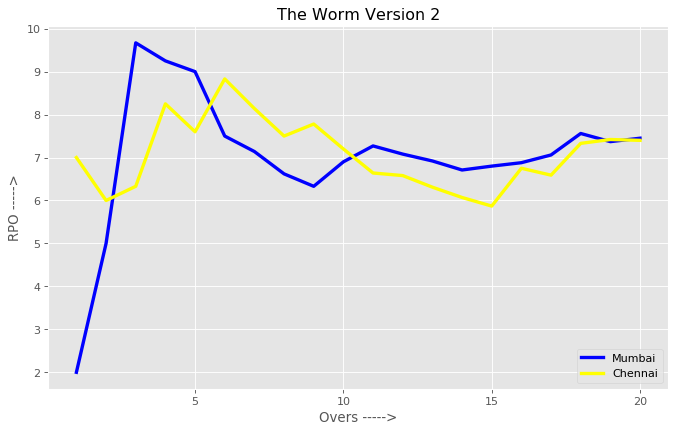

In [101]:
mumbai_endover_score['RPO'] = round(mumbai_endover_score['Cumulative Score']/mumbai_endover_score['Over'],2)
chennai_endover_score['RPO'] = round(chennai_endover_score['Cumulative Score']/chennai_endover_score['Over'],2)
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.xticks([5,10,15,20])
    plt.plot(mumbai_endover_score['Over'],mumbai_endover_score['RPO'], color='blue', linewidth=3, label='Mumbai')
    plt.plot(chennai_endover_score['Over'],chennai_endover_score['RPO'], color='yellow', linewidth=3, label='Chennai')
    plt.xlabel('Overs ----->')
    plt.ylabel('RPO ----->')
    plt.title('The Worm Version 2')
    plt.legend(loc='lower right')
    plt.show()

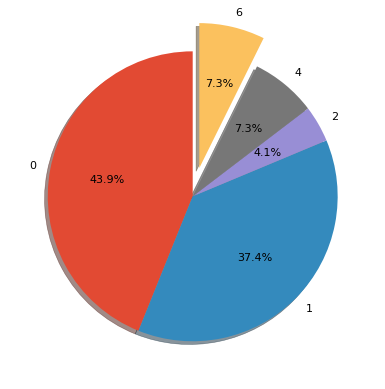

In [102]:
mumbai_inns = score_df.loc[score_df['Batting Team'].isin(['Mumbai'])]
chennai_inns = score_df.loc[score_df['Batting Team'].isin(['Chennai'])]
mumbai_inns = mumbai_inns.groupby('Runs Scored')['Ball #'].count()
chennai_inns = chennai_inns.groupby('Runs Scored')['Ball #'].count()
explode = (0,0,0,0,0.2)
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.pie(mumbai_inns, labels=mumbai_inns.index.values,explode=explode,shadow=True,autopct='%1.1f%%', startangle=90)
    #explode = (0,0,0,0,0,0.2)
    #plt.pie(chennai_inns, labels=chennai_inns.index.values,explode=explode,shadow=True,autopct='%1.1f%%', startangle=90)
    plt.show()


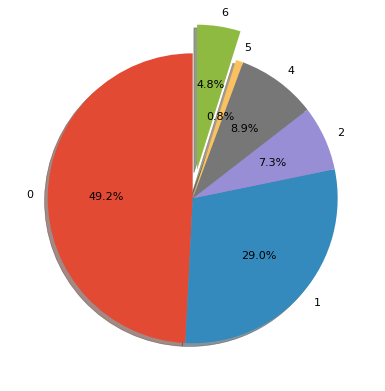

In [103]:
explode = (0,0,0,0,0,0.2)
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.pie(chennai_inns, labels=chennai_inns.index.values,explode=explode,shadow=True,autopct='%1.1f%%', startangle=90)
    plt.show()

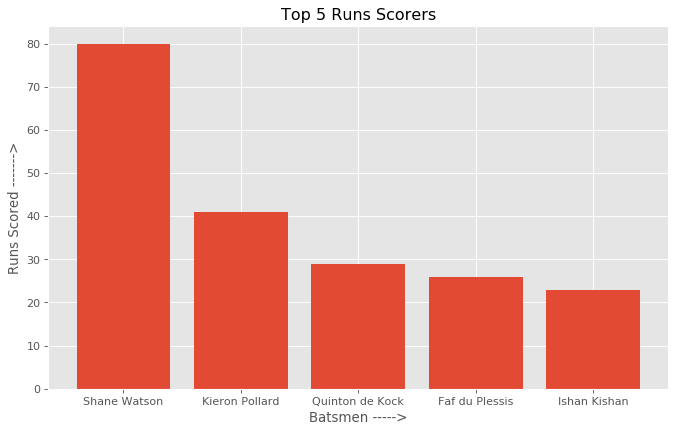

In [104]:
batsman_runs = score_df.groupby('Batsman Facing').sum()
batsman_runs = batsman_runs.sort_values(['Runs Scored'],ascending=False)
batsman_runs = batsman_runs['Runs Scored']
batsman_runs = batsman_runs[:5]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.bar(batsman_runs.index.values, batsman_runs)
    plt.title('Top 5 Runs Scorers')
    plt.xlabel('Batsmen ----->')
    plt.ylabel('Runs Scored ------->')
    plt.show()
#score_df.groupby('Batsman Facing').groups('Shane Watson')

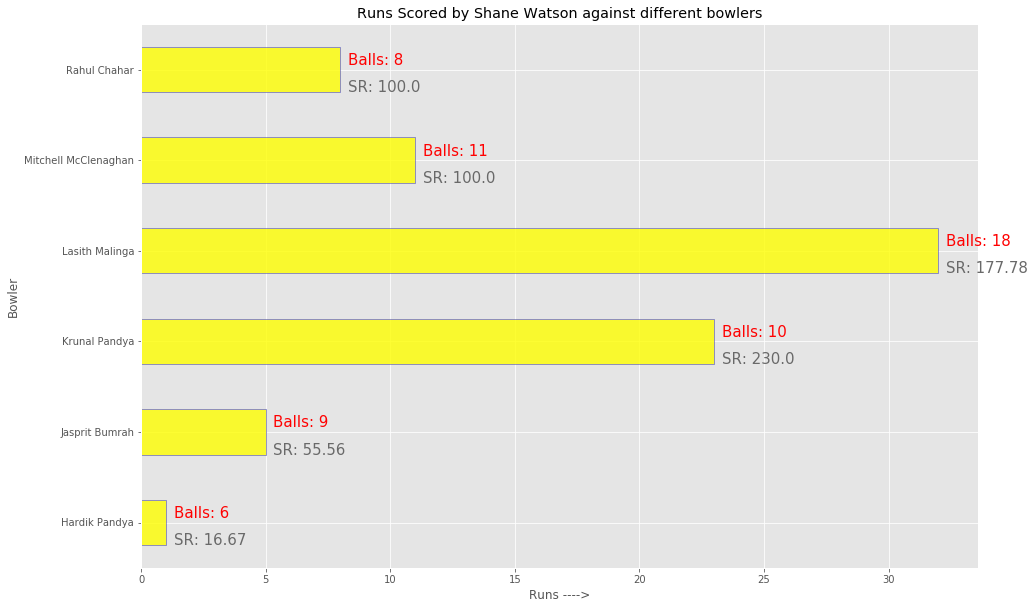

In [125]:
most_runs = score_df.loc[score_df['Batsman Facing'].isin(['Shane Watson'])]
most_runs = most_runs.drop(columns=['Batting Team', 'Over', 'Ball #', 'Cumulative Score', 'Wickets', 'Wicket Indicator'])
most_runs['Delivery Count'] = 1;
most_runs = most_runs.groupby('Bowler').sum()
most_runs['Strike Rate'] = (most_runs['Runs Scored']/most_runs['Delivery Count'])*100
runs_series = pd.Series(most_runs['Runs Scored']) 
strike_rate = list(most_runs.iloc[:,3])
deliveries = list(most_runs.iloc[:,2])
with plt.style.context('ggplot'):
    plt.figure(figsize=(15, 10))
    ax = runs_series.plot(kind='barh', color='yellow', edgecolor='blue', alpha=0.8)
    ax.set_title('Runs Scored by Shane Watson against different bowlers')
    ax.set_xlabel('Runs ---->')
    count=0
    for i in ax.patches:
        ax.text(i.get_width()+0.3, i.get_y(), 'SR: '+str(round(strike_rate[count],2)), fontsize=15, color='dimgrey')
        ax.text(i.get_width()+0.3, i.get_y()+.3, 'Balls: '+str(round(deliveries[count],2)), fontsize=15, color='red')
        count = count+1

In [115]:
score_df['Delivery Count'] = 1
bowlers = score_df.groupby('Bowler').sum()
bowlers = bowlers.drop(columns=['Over', 'Ball #', 'Extra', 'Cumulative Score', 'Wickets'])
bowlers['Economy'] = round((bowlers['Runs Scored']/bowlers['Delivery Count'])*6.0,2)
bowlers = bowlers.sort_values(['Wicket Indicator', 'Economy'], ascending=[False,True])
bowlers = bowlers[:5]
bowlers

,Runs Scored,Wicket Indicator,Delivery Count,Economy
Bowler,,,,
Deepak Chahar,25,3,25,6.00
Jasprit Bumrah,14,2,24,3.50
Imran Tahir,23,2,18,7.67
Shardul Thakur,37,2,24,9.25
Lasith Malinga,48,2,25,11.52


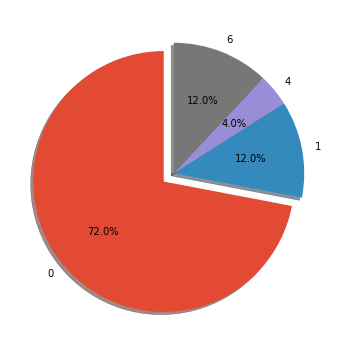

In [121]:
best_bowler = score_df.loc[score_df['Bowler'].isin(['Deepak Chahar'])]
best_bowler1 = best_bowler.groupby('Runs Scored').count()
best_bowler1 = best_bowler1['Delivery Count']
explode = [0.1,0,0,0]
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,6))
    plt.pie(best_bowler1, labels=best_bowler1.index.values, startangle=90, explode=explode, shadow=True,autopct='%1.1f%%')
    plt.show()

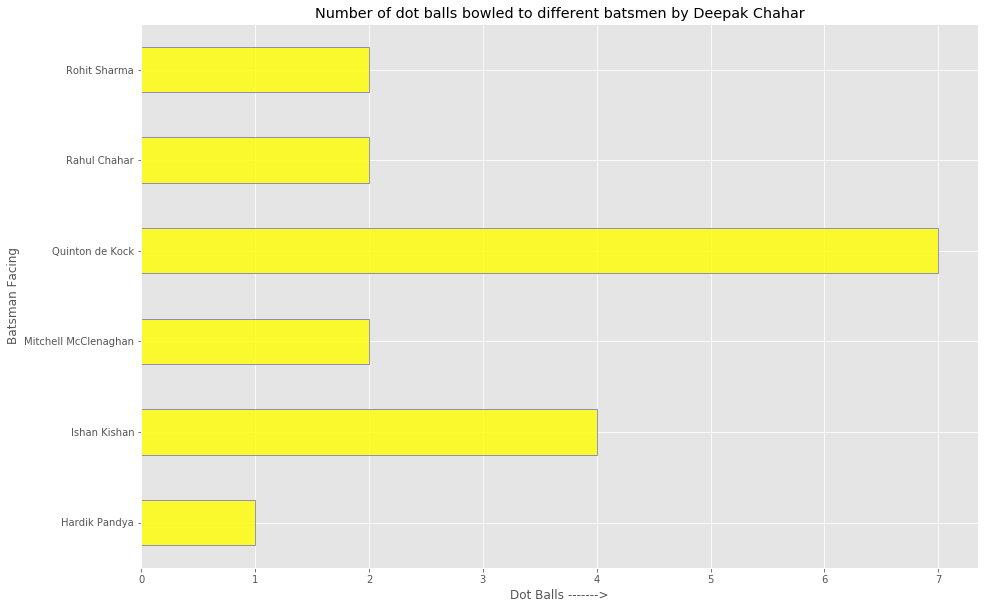

In [127]:
best_bowler = best_bowler.loc[best_bowler['Runs Scored'].isin([0])]
best_bowler2 = best_bowler.groupby('Batsman Facing').count()
best_bowler2 = best_bowler2['Delivery Count']
with plt.style.context('ggplot'):
    plt.figure(figsize=(15, 10))
    ax = best_bowler2.plot(kind='barh', color='yellow', edgecolor='blue', alpha=0.8)
    ax.set_title('Number of dot balls bowled to different batsmen by Deepak Chahar')
    ax.set_xlabel('Dot Balls ------->')